# Sales Prediction Using Simple Linear Regression

## Steps Involved
1. Read and Understand the Data


In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

In [8]:
# Reading the data set
df = pd.read_csv(r"C:\Users\sudha\Downloads\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
# Checking the shape of data
df.shape

(200, 4)

Data contains 200 rows and 4 columns

In [13]:
# Checking the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


All the rows contains float type of data and no null values are there

In [16]:
# Checking the statistical summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Visualising the data

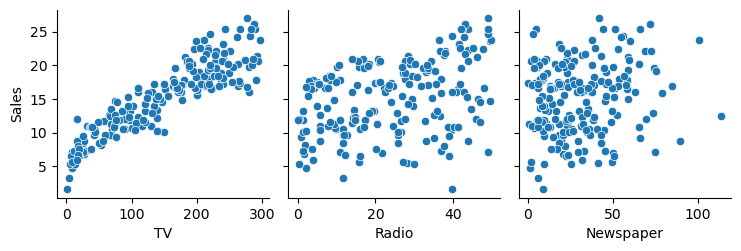

In [19]:
sns.pairplot(x_vars = ['TV','Radio','Newspaper'], y_vars='Sales', data=df)
plt.show()

Insights
- TV and Sales: Data is uniformly distributed and we can fit best fit of line for this which concluded model will be a good fit
- Radio and Sales: Not good compared to TV and Sales, Data is distributed along y-axis
- Newspaper and Sales: Less Stable, More diverse data

Heatmap can be used to visualise the correlation b/w the target and independent variables

<Axes: >

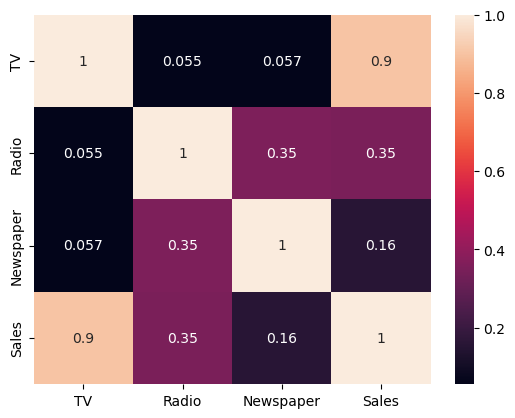

In [26]:
sns.heatmap(df.corr(), annot=True)

As expected, TV and Sales has high corelation value of 0.9 whereas 0.35 for Radio and Sales and 0.16 for Newspaper and Sales

#### Performing Simple Linear Regression

In [30]:
import sklearn
from sklearn.model_selection import train_test_split

##### 1. Creation of X and y

In [35]:
X = df['TV']
y = df['Sales']

##### 2. Train-Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 90)

In [42]:
X_train.shape

(140,)

##### Training the model using Statsmodel Library

By default, Statsmodel library not contains the constant so we need to add it manually

In [46]:
X_train_sm = sm.add_constant(X_train)

In [48]:
X_train_sm.head()

,const,TV
187,1.0,191.1
60,1.0,53.5
94,1.0,107.4
43,1.0,206.9
163,1.0,163.5


##### Fitting the model

In [51]:
lr = sm.OLS(y_train, X_train_sm)

In [53]:
lr_model = lr.fit()

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     719.6
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.33e-56
Time:                        06:04:02   Log-Likelihood:                -310.00
No. Observations:                 140   AIC:                             624.0
Df Residuals:                     138   BIC:                             629.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7672      0.360     18.809      0.000       6.056       7.479
TV             0.0568      0.002     26.825      0.000       0.053       0.061
==============================================================================
Omnibus:                        0.761   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.488
Skew:                          -0.133   Prob(JB):                        0.783
Kurtosis:                       3.114   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

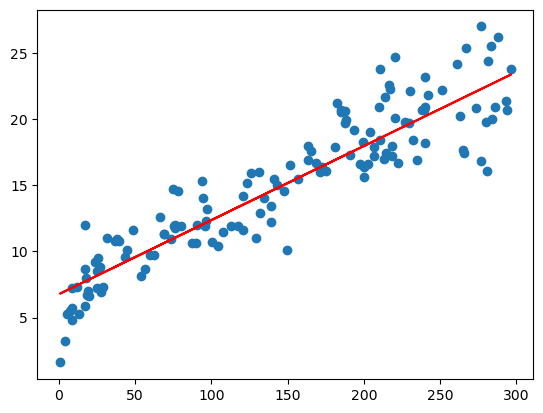

In [61]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.767+0.056*X_train, 'r')
plt.show()

##### Residual Analysis

In [64]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

187    17.629341
60      9.808113
94     12.871806
43     18.527418
163    16.060548
         ...    
67     14.685012
159    14.253026
114    11.212069
157    15.281836
91      8.392789
Length: 140, dtype: float64

In [66]:
res = y_train - y_train_pred

C:\Users\sudha\AppData\Local\Temp\ipykernel_248\1059939519.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


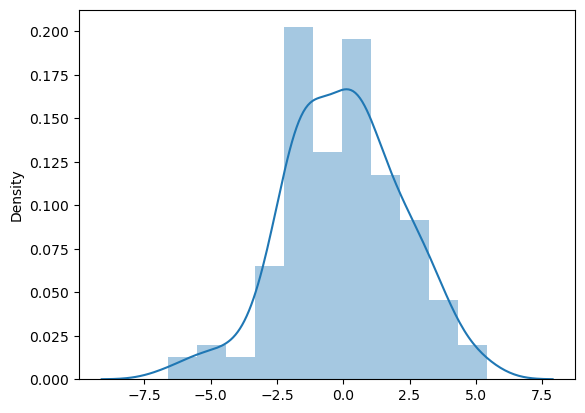

In [68]:
plt.figure()
sns.distplot(res)
plt.show()

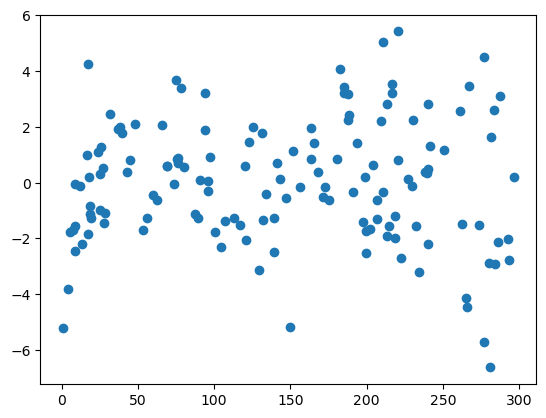

In [74]:
plt.scatter(X_train, res)

Here we are not able to find any patterns in residual analysis so predicitions are good

##### Predicitons and Evaluation on Test Set

In [78]:
X_test_sm = sm.add_constant(X_test)

In [82]:
y_test_pred = lr_model.predict(X_test_sm)

##### Evaluation of Model

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [97]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7186373885738093

In [99]:
r2 = r2_score(y_train, y_train_pred)
r2 

0.8390820270055144

Linear Regression using `sklearn`

##### 1. Train Test Split

In [123]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state = 100)

In [125]:
from sklearn.linear_model import LinearRegression

In [127]:
lm = LinearRegression()

In [129]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [131]:
lm.fit(X_train_lm, y_train)

LinearRegression()

##### Making Predicitions

In [136]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [138]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.792103160124566

In [140]:
r2 = r2_score(y_train, y_train_pred)
r2 

0.8157933136480388

r2 score on test using statsmodel was 73% and using the sklearn it is 79% which is considerably good.